In [2]:
# Import statements 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 
import os as os 
%matplotlib inline 
#os.getcwd()

In [3]:
# load the data 
moviesData = pd.read_csv("P4-Movie-Ratings.csv")

In [4]:
moviesData

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [5]:
moviesData.columns = [
    "Film",
    "Genre", 
    "RottenTomatoesRatings",
    "AudienceRatings", 
    "Budget",
    "YearOfRelease"]

In [6]:
moviesData.Film = moviesData.Film.astype("category")
moviesData.Genre = moviesData.Genre.astype("category")
moviesData.YearOfRelease = moviesData.YearOfRelease.astype("category")

moviesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Film                   559 non-null    category
 1   Genre                  559 non-null    category
 2   RottenTomatoesRatings  559 non-null    int64   
 3   AudienceRatings        559 non-null    int64   
 4   Budget                 559 non-null    int64   
 5   YearOfRelease          559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


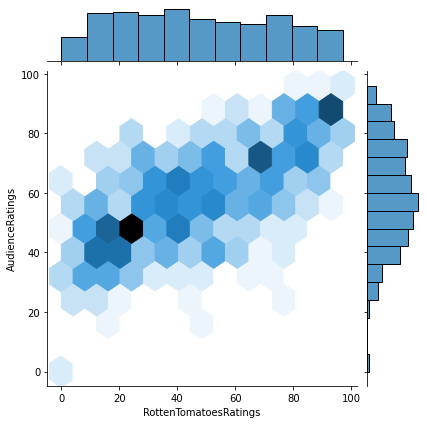

In [7]:
# jointplot [kind and other param available]
sns.jointplot(data = moviesData, x = "RottenTomatoesRatings", y = "AudienceRatings", kind = "hex")

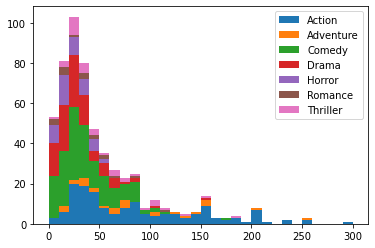

In [8]:
# histogram []
labels = []
budgetByGenre = []
for genre in moviesData.Genre.cat.categories:
    budgetByGenre.append(moviesData[moviesData.Genre == genre].Budget)
    labels.append(genre)
plt.hist(budgetByGenre, bins = 30, stacked = True)
plt.legend(labels)
plt.show()

/Users/mayank/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mayank/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


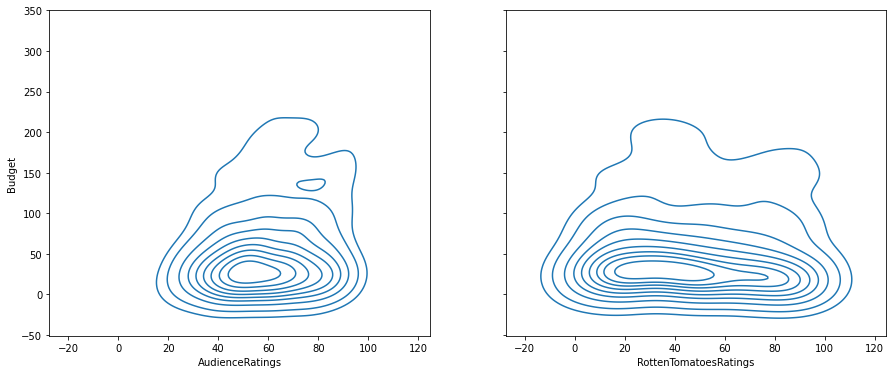

In [9]:
# KDE Plot 

f, axes = plt.subplots(1, 2, figsize = (15,6), sharex = True, sharey = True)
kdeplot1 = sns.kdeplot(moviesData.AudienceRatings, moviesData.Budget, ax = axes[0])
kdeplot2 = sns.kdeplot(moviesData.RottenTomatoesRatings, moviesData.Budget, ax = axes[1])

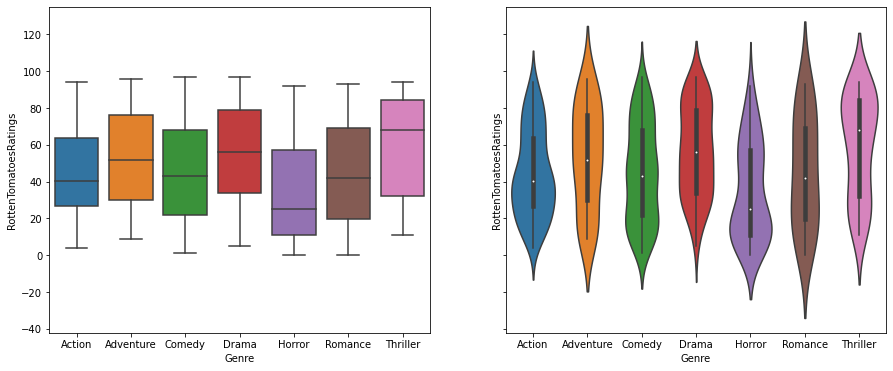

In [10]:
# violin plot vs box plots 
f, axes = plt.subplots(1, 2, figsize = (15, 6), sharex= True, sharey = True)
box = sns.boxplot(data = moviesData, x = moviesData.Genre, y = moviesData.RottenTomatoesRatings, ax = axes[0])
vilon = sns.violinplot(data = moviesData, x = moviesData.Genre, y = moviesData.RottenTomatoesRatings, ax = axes[1])

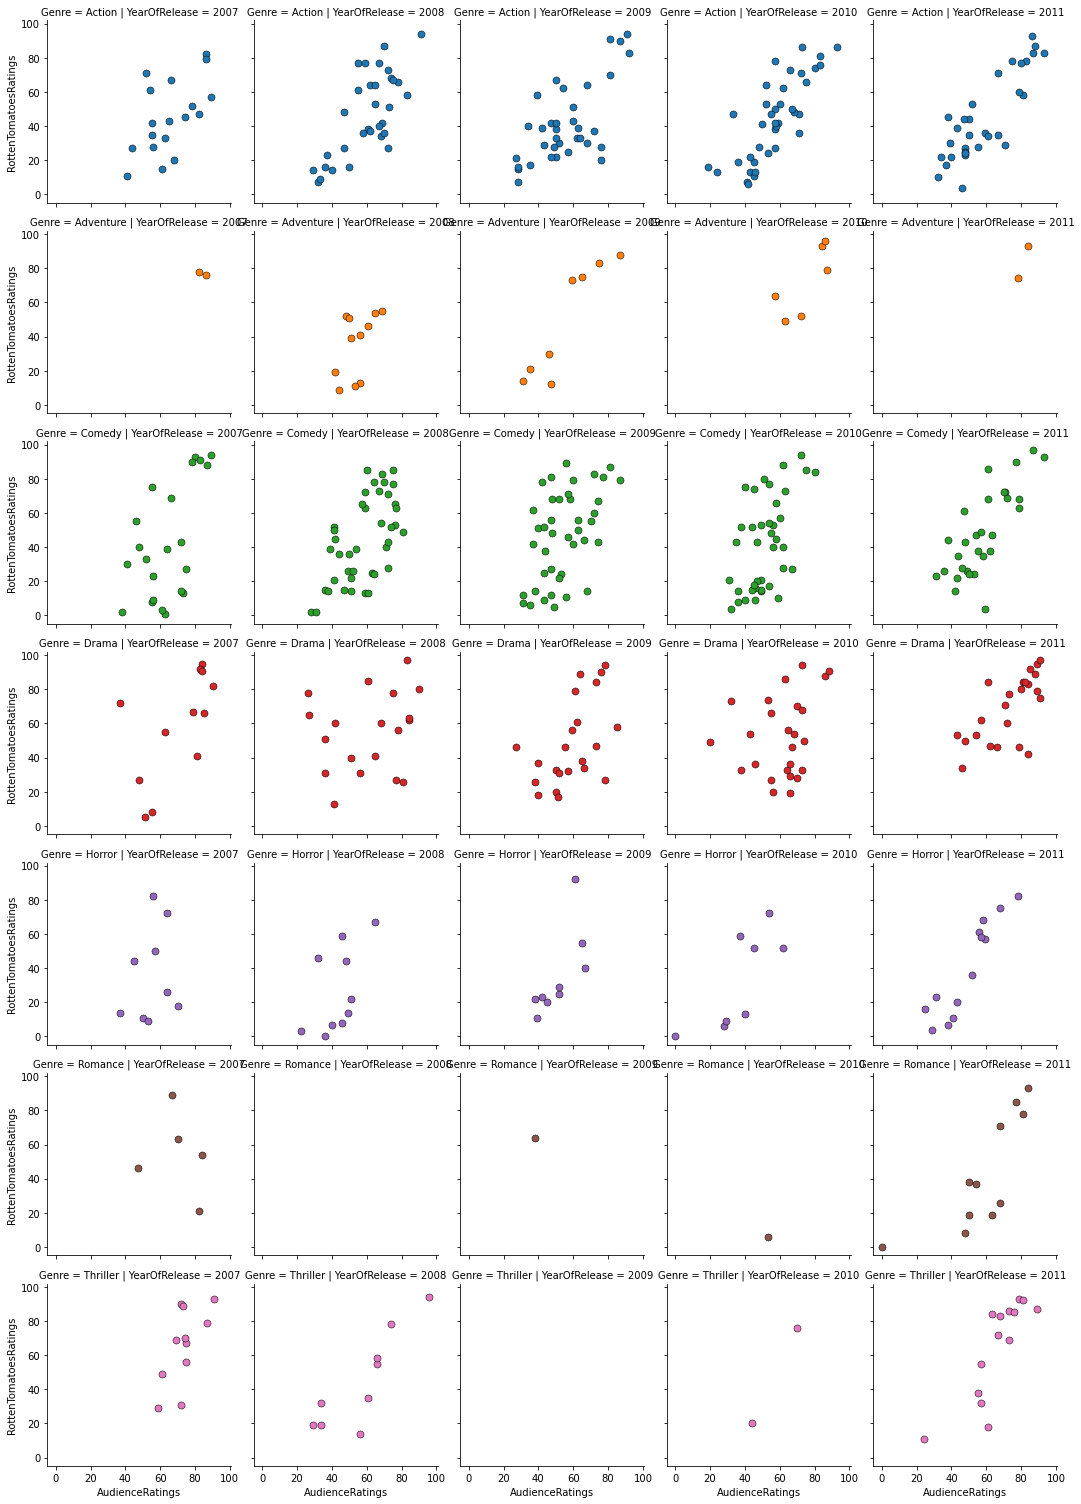

In [11]:
# facet grid -- create grid for category of the data 
grid = sns.FacetGrid( moviesData, row = 'Genre', col = 'YearOfRelease', hue = 'Genre')
keywordargs = {'edgecolor': 'black', 's': 50, 'linewidth':.5}
grid.map(plt.scatter, "AudienceRatings", "RottenTomatoesRatings", **keywordargs)

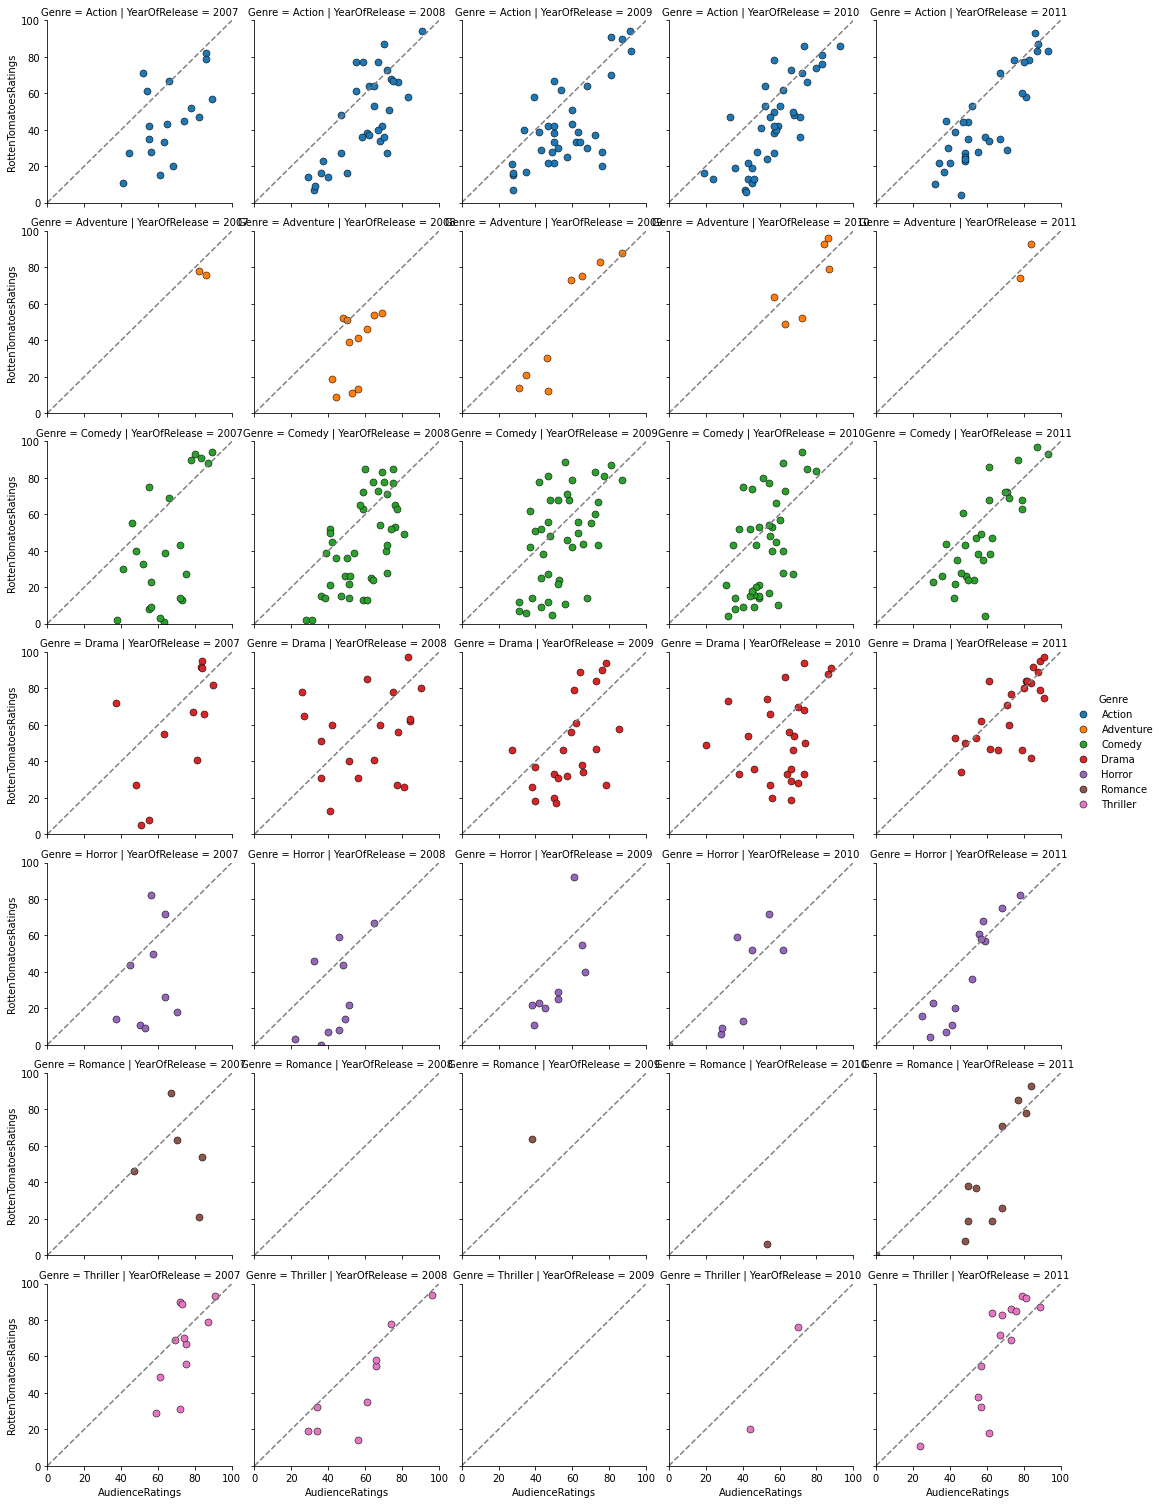

In [17]:
# coordinates and diagonals
grid = sns.FacetGrid( moviesData, row = 'Genre', col = 'YearOfRelease', hue = 'Genre')
keywordargs = {'edgecolor': 'black', 's': 50, 'linewidth':.5}
grid.map(plt.scatter, "AudienceRatings", "RottenTomatoesRatings", **keywordargs)
grid.set(xlim = (0,100), ylim = (0,100))
# add a diagonal in each of the grid 
for ax in grid.axes.flat:
    ax.plot((0,100), (0,100), c = 'gray', ls = '--')
grid.add_legend()